<h3>DataSet</h3>
<h4>Evaluation of the accuracy of training different sizes of data.</h4>

Evaluate the accuracy of training set sizes for MNIST. Result should show using the base neural network architecture a performance curve (set of evaluated models each trained on a subset of the training data). 

Outcome: Using the base architecture and training process (nearly 99% accurate) as base, demonstrate the training of the same architecture model with various fractions (subsets) of the training set (10%...90%). 

The framework created must have some functional parameters (example: number of reduced training samples to try or an input list reflecting various training sample sizes).


In [1]:
## Setup
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot

from keras.models import model_from_json
from keras.models import load_model

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten


from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# try:
#     # Disable all GPUS
#     tf.config.set_visible_devices([], 'GPU')
#     visible_devices = tf.config.get_visible_devices()
#     for device in visible_devices:
#         assert device.device_type != 'GPU'
# except:
#     # Invalid device or cannot modify virtual devices once initialized.
#     pass

In [2]:
def prepareData(numClasses, inputShape):
    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
    
    # Scale images to the [0, 1] range
    x_train = x_train.astype("float32") / 255
    x_test = x_test.astype("float32") / 255
    # Make sure images have shape (28, 28, 1)
    x_train = np.expand_dims(x_train, -1)
    x_test = np.expand_dims(x_test, -1)
    print("x_train shape:", x_train.shape)
    print("x_test shape:", x_test.shape)


    print(x_train.shape[0], "train samples")
    print(x_test.shape[0], "test samples")

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, numClasses)
    y_test = keras.utils.to_categorical(y_test, numClasses)
    
    return x_train, y_train, x_test, y_test
    
x_train, y_train, x_test, y_test = prepareData(10, (28,28,1))

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
60000 train samples
10000 test samples


In [32]:
def base_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    return model
    
def smallVGG_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((3, 3)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3), padding='same'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3), padding='same'))
    model.add(Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3), padding='same'))
    model.add(Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3), padding='same'))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model

# Bonus model I wanted to try and implement
def VGG16_model():
    model = Sequential()
    model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(Conv2D(filters=64,kernel_size=(3,3), activation="relu", padding="same"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding="same"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding="same"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation="relu", padding="same"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation="relu", padding="same"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation="relu", padding="same"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3),activation="relu", padding="same"))
    model.add(Conv2D(filters=512, kernel_size=(3,3),activation="relu", padding="same"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding="same"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding="same"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding="same"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding="same"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Flatten())
    model.add(Dense(units=4096,activation="relu"))
    model.add(Dense(units=4096,activation="relu"))
    model.add(Dense(units=2, activation="softmax"))

    return model

def default():
    print('Invalid model, please choose base_model or smallVGG_model')

models = {
    1: base_model,
    2: smallVGG_model,
    3: VGG16_model
}

def run_model(typeOfModel):
    return models.get(typeOfModel, default)()

<h1>BASE MODEL</h1>

In [4]:
baseModel = run_model(1)
baseModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               160100    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [5]:
'''Function to train a specific percentage of images.
originalNumImages = total number of images in set
'''

# With enough memory with such a large dataset such as this you can run this function to test
# various percentages of the data as training. Otherwise run trainData2 (which is what I had to do)
def trainData(baseModel,batchSizes,epochs,xTrain,yTrain,yTest):
    trainingSet = dict()
    baseModel.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    epochs = epochs
    
    for batchSize in batchSizes:
        history=baseModel.fit(xTrain, yTrain, batch_size=batchSize, epochs=epochs, validation_split=0.1)
        trainingSet[batchSize] = history
#     batch_size = int((batchSize /100) * (yTrain.size + yTest))
#     print(yTrain.size + yTest.size,batch_size)
#     print(trainingSet)
    return trainingSet

# Random Sizes of data sets, due to limitation of memory size. Ideally you would put percentages from 10 to 90% 
# and then uncomment line 15 and run but in doing so I ran out of memory on the machine and it caused an error.
batchSizes = [10,20,50,100,150,200,400,800]
    
baseTrainingSet = trainData(baseModel,batchSizes,10, x_train, y_train, y_test)

Epoch 1/10
5400/5400 [==============================] - 20s 4ms/step - loss: 0.1134 - accuracy: 0.9654 - val_loss: 0.0451 - val_accuracy: 0.9860
Epoch 2/10
5400/5400 [==============================] - 20s 4ms/step - loss: 0.0418 - accuracy: 0.9872 - val_loss: 0.0407 - val_accuracy: 0.9890
Epoch 3/10
5400/5400 [==============================] - 20s 4ms/step - loss: 0.0272 - accuracy: 0.9915 - val_loss: 0.0419 - val_accuracy: 0.9887
Epoch 4/10
5400/5400 [==============================] - 20s 4ms/step - loss: 0.0196 - accuracy: 0.9937 - val_loss: 0.0429 - val_accuracy: 0.9907
Epoch 5/10
5400/5400 [==============================] - 20s 4ms/step - loss: 0.0156 - accuracy: 0.9950 - val_loss: 0.0474 - val_accuracy: 0.9900
Epoch 6/10
5400/5400 [==============================] - 20s 4ms/step - loss: 0.0129 - accuracy: 0.9957 - val_loss: 0.0438 - val_accuracy: 0.9915
Epoch 7/10
5400/5400 [==============================] - 20s 4ms/step - loss: 0.0098 - accuracy: 0.9969 - val_loss: 0.0618 - val_ac

<h1>Evaluation</h1>
<h4>Build the confusion matrix for the MNIST x_test input to show which categories are the best predicted and worst predicted.</h4>

Use sckit-learn tools to generate results of sensitivity/specificity and precision/recall

In [6]:
## Evaluate the trained model
def evaluate_model(model):
    score = model.evaluate(x_test, y_test, verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])

In [7]:
evaluate_model(baseModel)

Test loss: 0.06666579842567444
Test accuracy: 0.9937000274658203


In [8]:
def summarize_diagnostics(histories):
    fig, axs = plt.subplots(len(histories), 2)
    plt.subplots_adjust(left=0, bottom=0, right=3, top=10, wspace=0.2, hspace=0.2)
    
    for i in range(len(histories)):
        axs[i, 0].set_ylabel('Batch Size: ' + str(batchSizes[i]))
        axs[i, 1].set_ylabel('Batch Size: ' + str(batchSizes[i]))
        axs[i, 0].plot(histories[i].history['loss'], color='blue', label='train')
        axs[i, 0].plot(histories[i].history['val_loss'], color='orange', label='test')
        axs[i, 0].set_title('Cross Entropy Loss')
        axs[i, 1].plot(histories[i].history['accuracy'], color='blue', label='train')
        axs[i, 1].plot(histories[i].history['val_accuracy'], color='orange', label='test')
        axs[i, 1].set_title('Classification Accuracy')

    for ax in axs.flat:
        ax.set(xlabel='Training Epochs')

def get_histories(trainingSet):
    histories = []
    for dataSetSizes in trainingSet.keys():
        histories.append(trainingSet[dataSetSizes])
#     print(histories)
    return histories

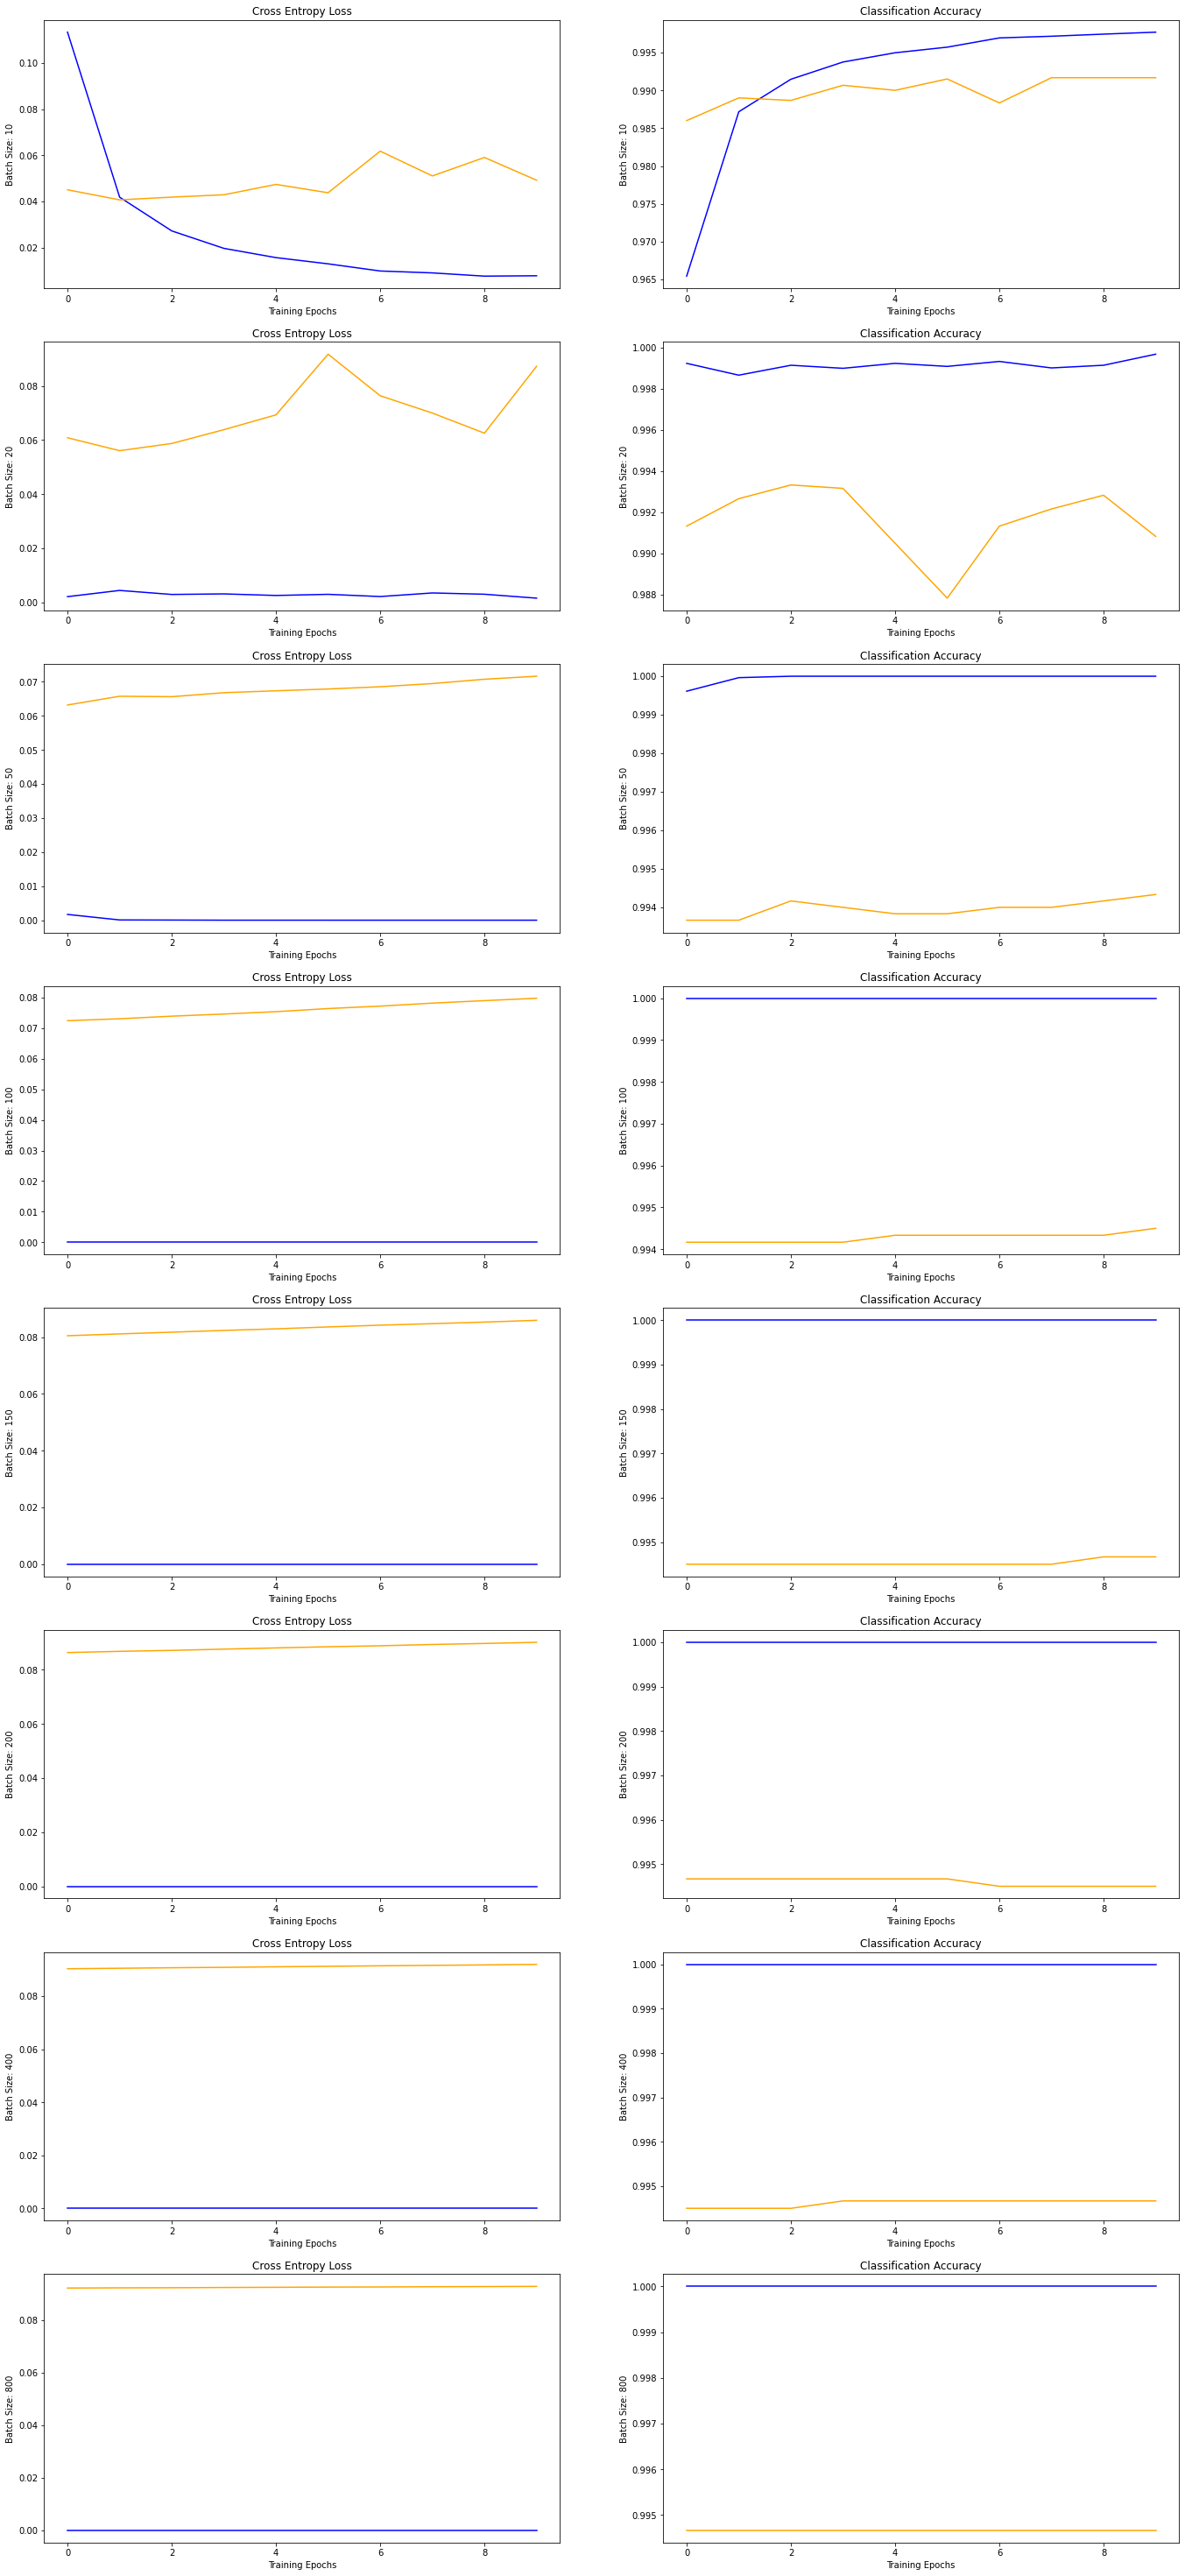

In [9]:
baseHistories = get_histories(baseTrainingSet);
summarize_diagnostics(baseHistories)

In [10]:
baseResults = baseModel.predict(x_test,verbose=0)
print(baseResults)

[[0.0000000e+00 9.1502510e-34 1.0267292e-31 ... 1.0000000e+00
  1.3907616e-33 1.2022675e-27]
 [7.5430747e-30 9.6316328e-30 1.0000000e+00 ... 0.0000000e+00
  1.3505047e-33 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 4.6355742e-30 ... 3.3325743e-26
  2.8014835e-27 1.9006287e-31]
 ...
 [0.0000000e+00 9.4860421e-36 0.0000000e+00 ... 8.6474915e-36
  3.1239059e-37 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.5542651e-34 0.0000000e+00]
 [9.9471609e-37 5.2942530e-38 3.4850857e-31 ... 0.0000000e+00
  6.6772671e-29 0.0000000e+00]]


In [11]:
# These are class numbers
predict_baseResults = baseModel.predict_classes(x_test)
print(predict_baseResults)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[7 2 1 ... 4 5 6]


In [12]:
# How do the predictions look compared to the actual ground truth of y_test
for index in range(20):
    print (predict_baseResults[index], y_test[index])

7 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
2 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
0 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
9 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
9 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
6 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
9 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
9 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
7 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
3 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [13]:
# Remember the above had to be encoded using categorical
# So let's use the result of the Python Guide (argmax) to reduce the ground truth
# But only look at the first 20 results
for index in range(20):
    print (predict_baseResults[index], np.argmax(y_test[index], axis=-1))

7 7
2 2
1 1
0 0
4 4
1 1
4 4
9 9
5 5
9 9
0 0
6 6
9 9
0 0
1 1
5 5
9 9
7 7
3 3
4 4


[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4]
[[ 977    0    1    1    0    1    2    0    1    0]
 [   0 1132    0    0    0    0    2    3    0    0]
 [   0    0 1027    2    0    1    0    3    2    0]
 [   0    1    0 1004    0    5    0    0    1    0]
 [   0    0    0    0  978    0    2    0    0    5]
 [   0    1    0    2    0  884    2    0    0    2]
 [   0    1    1    0    0    1  950    0    1    0]
 [   1    0    3    0    0    0    0 1018    0    2]
 [   2    0    0    1    0    0    0    2  968    1]
 [   0    0    0    0    4    0    0    2    1  999]]


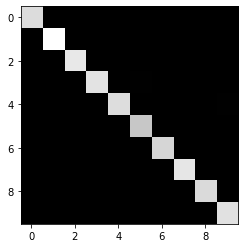

In [14]:
def build_confusion_matrix(model):
    model.save(str(model) + '_MNIST.h5')
    test_model=load_model(str(model) + '_MNIST.h5')
    predictions = test_model.predict_classes(x_test)

    y_results=[]
    for index in range(len(predict_baseResults)):
        y_results.append(np.argmax(y_test[index]))

    print(y_results[:20])
    
    confusion= confusion_matrix(predict_baseResults,y_results)
    print(confusion)
    plt.imshow(confusion, cmap="gray")

build_confusion_matrix(baseModel)

<h1>Architecture</h1>
<h4>Evaluate changes to the size of convolutional kernels, pooling, dense fully connected, and report on the influence to the “summary” performance of the test sets.</h4>

Using the MNIST dataset, Construct and evaluate a summary view of a different neural network called smallVGG

Evaluate changes to the size of convolutional kernels, pooling, dense fully connected, and report on the influence to the “summary” performance of the test sets.

Outcome: Define code for a different CNN architecture base architecture and using the same training process, evaluate the effectiveness of various parameters.  Example- do your results show the smallest level of dense network needed to achieve within 1-5% of the best case.

Compare the smallVGG performance to the base_model (used in the starter jupyter notebooks)


<h1>SMALL VGG MODEL</h1>

In [15]:
smallVGGModel = run_model(2)
smallVGGModel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 128)        

In [16]:
# Random Sizes of data sets, due to limitation of memory size. Ideally you would put percentages from 10 to 90% 
# and then uncomment line 15 and run but in doing so I ran out of memory on the machine and it caused an error.

smallVGGTrainingSet = trainData(smallVGGModel,batchSizes,10, x_train, y_train, y_test)

Epoch 1/10
5400/5400 [==============================] - 27s 5ms/step - loss: 0.2336 - accuracy: 0.9225 - val_loss: 0.0692 - val_accuracy: 0.9815
Epoch 2/10
5400/5400 [==============================] - 27s 5ms/step - loss: 0.0715 - accuracy: 0.9805 - val_loss: 0.0517 - val_accuracy: 0.9868
Epoch 3/10
5400/5400 [==============================] - 27s 5ms/step - loss: 0.0545 - accuracy: 0.9848 - val_loss: 0.0437 - val_accuracy: 0.9885
Epoch 4/10
5400/5400 [==============================] - 27s 5ms/step - loss: 0.0449 - accuracy: 0.9878 - val_loss: 0.0423 - val_accuracy: 0.9895
Epoch 5/10
5400/5400 [==============================] - 27s 5ms/step - loss: 0.0380 - accuracy: 0.9895 - val_loss: 0.0477 - val_accuracy: 0.9880
Epoch 6/10
5400/5400 [==============================] - 26s 5ms/step - loss: 0.0352 - accuracy: 0.9904 - val_loss: 0.0412 - val_accuracy: 0.9890
Epoch 7/10
5400/5400 [==============================] - 27s 5ms/step - loss: 0.0314 - accuracy: 0.9919 - val_loss: 0.0442 - val_ac

<h1>Evaluation</h1>
<h4>Build the confusion matrix for the MNIST x_test input to show which categories are the best predicted and worst predicted.</h4>

Use sckit-learn tools to generate results of sensitivity/specificity and precision/recall


In [17]:
evaluate_model(smallVGGModel)

Test loss: 0.08893024176359177
Test accuracy: 0.9926000237464905


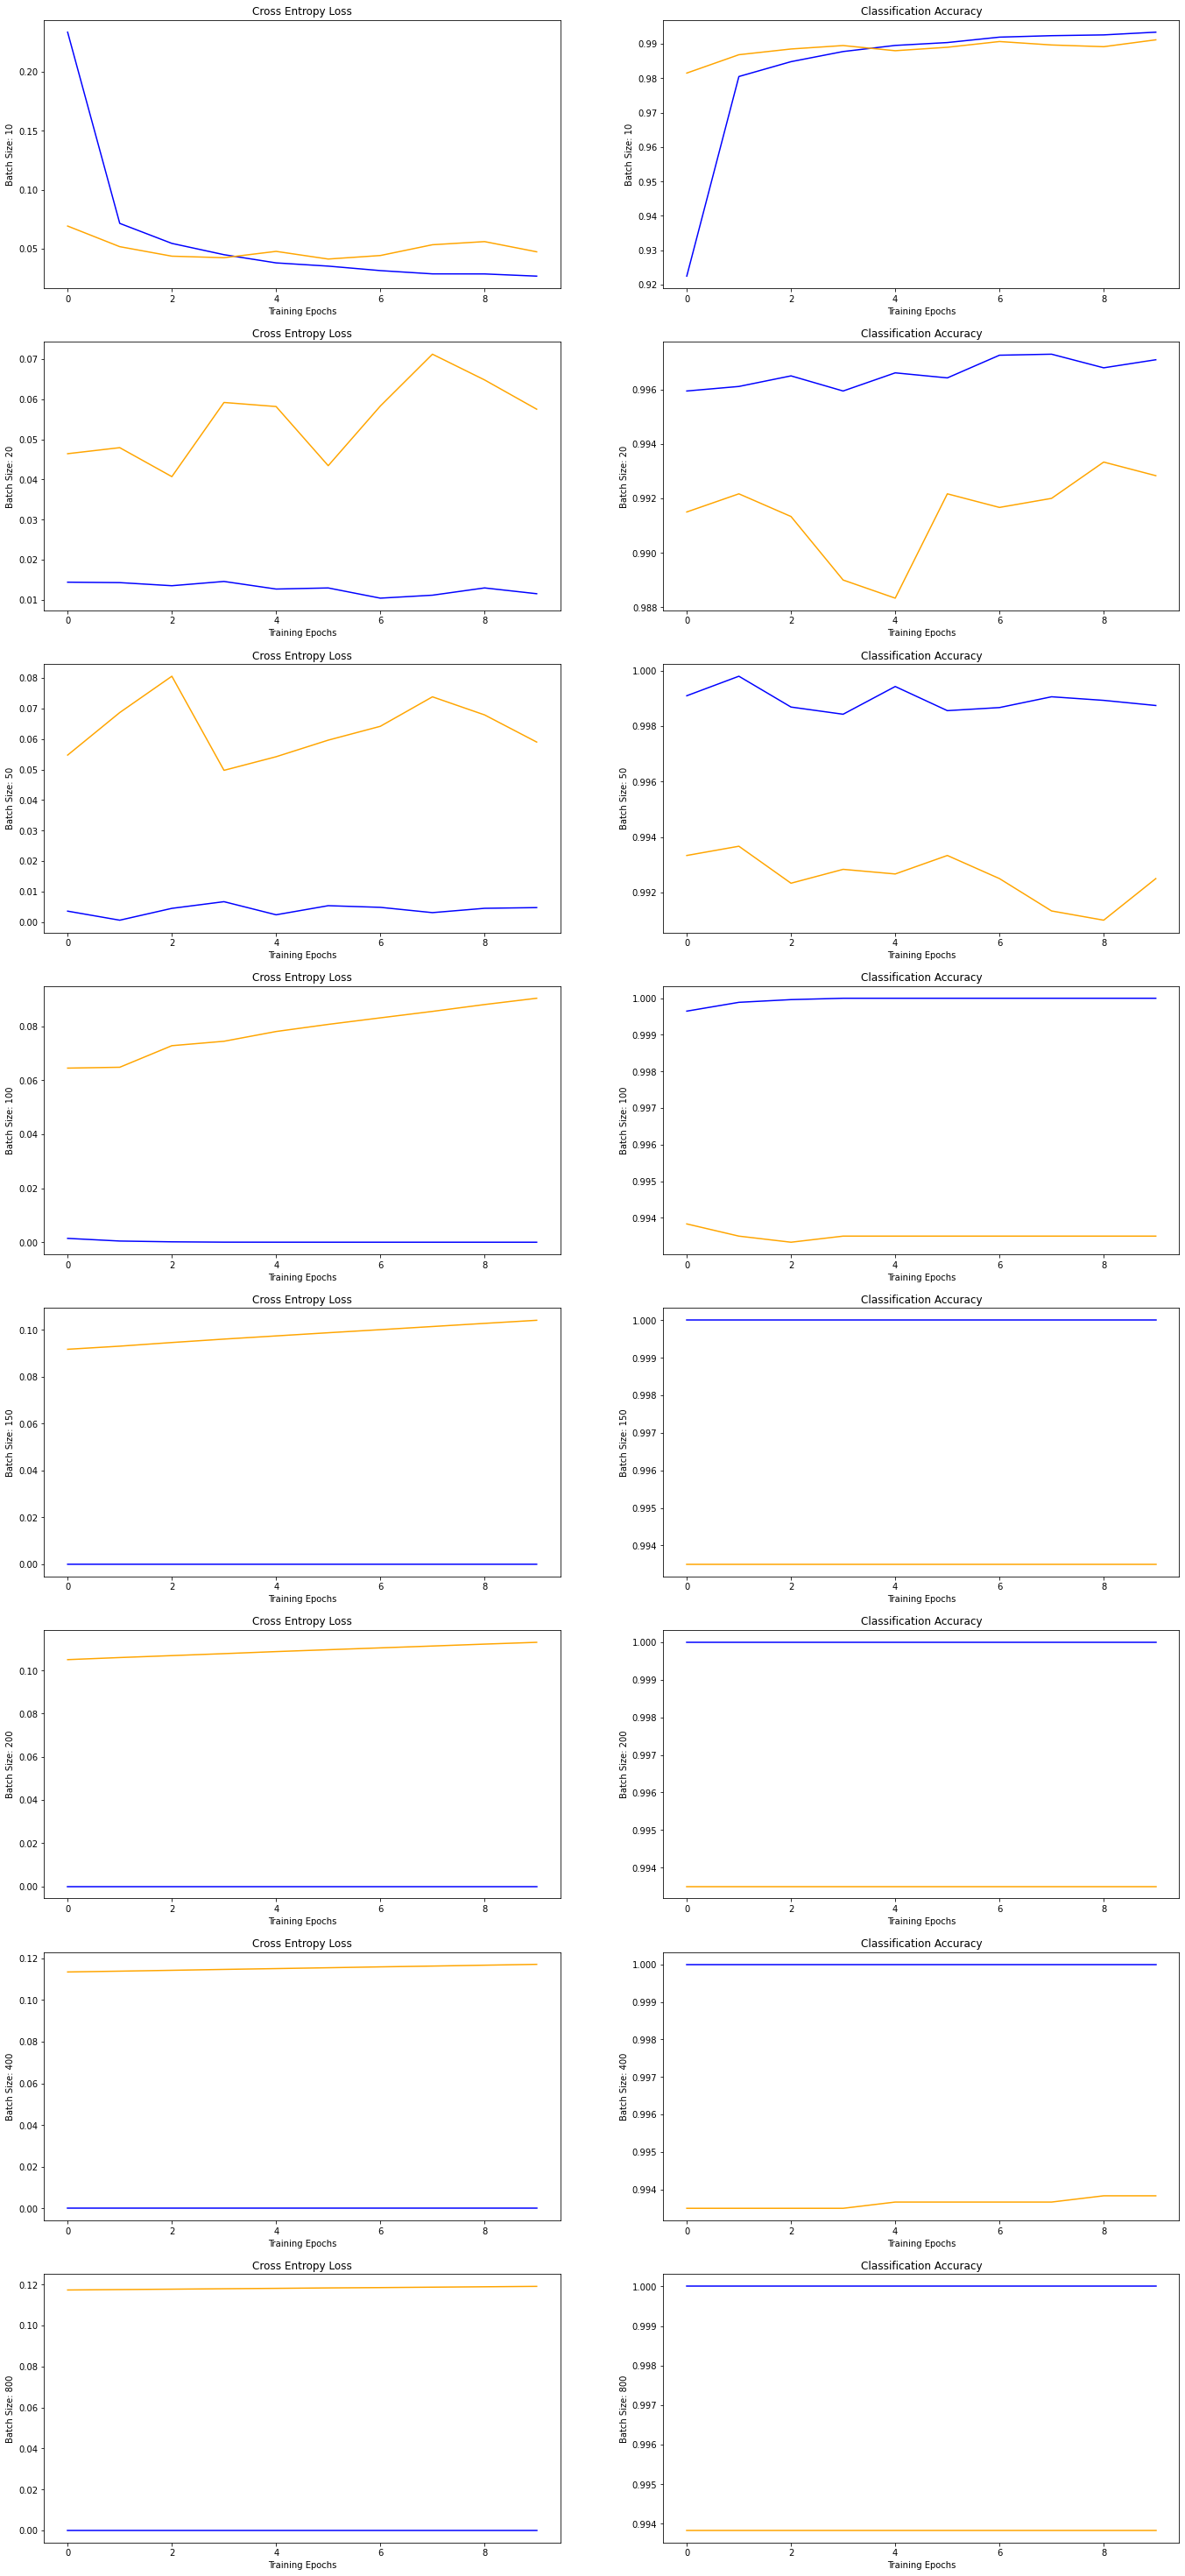

In [18]:
smallVGGHistories = get_histories(smallVGGTrainingSet);
summarize_diagnostics(smallVGGHistories)

In [19]:
smallVGGResults = smallVGGModel.predict(x_test,verbose=0)
print(smallVGGResults)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 ... 2.7450092e-38
  2.3744393e-30 1.1300674e-28]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 2.7315543e-31
  5.1315383e-32 4.6434012e-28]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


In [20]:
# These are class numbers
predict_smallVGGResults = smallVGGModel.predict_classes(x_test)
print(predict_smallVGGResults)

[7 2 1 ... 4 5 6]


[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4]
[[ 977    0    1    1    0    1    2    0    1    0]
 [   0 1132    0    0    0    0    2    3    0    0]
 [   0    0 1027    2    0    1    0    3    2    0]
 [   0    1    0 1004    0    5    0    0    1    0]
 [   0    0    0    0  978    0    2    0    0    5]
 [   0    1    0    2    0  884    2    0    0    2]
 [   0    1    1    0    0    1  950    0    1    0]
 [   1    0    3    0    0    0    0 1018    0    2]
 [   2    0    0    1    0    0    0    2  968    1]
 [   0    0    0    0    4    0    0    2    1  999]]


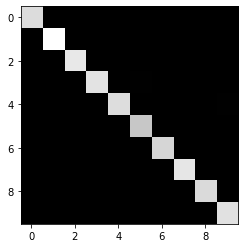

In [21]:
build_confusion_matrix(smallVGGModel)

<h1>BONUS VGG16</h1>
<h5>I wanted to learn for fun</h5>

In [33]:
VGG16Model = run_model(3)
VGG16Model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 224, 224, 64)      640       
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 56, 56, 256)      

In [35]:
# I couldn't get this working, but I was just curious to see how accurate I could get the model
# I halved the number of epochs due to how large the VGG16 network is
# batchSizes = [10,20,50,100]
# VGG16TrainingSet = trainData(VGG16Model,batchSizes,5, x_train, y_train, y_test)